In [35]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [36]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2023_Pr_YVO_Sectroscopy\\Visible\\0.1%'
folder = '0131_OD_laser'
path = dir + '\\' + folder + '\\'
file_list = os.listdir(path)
list_csv=natsorted([i for i in file_list if i.endswith('.CSV')]) # Sort the measured data file
referece_files=np.array(['OD013101.CSV','OD013102.CSV','OD013103.CSV'])
list_csv_new=np.delete(list_csv,[0,1,2])
file_size=np.shape(list_csv_new)

Plot_raw_data=1 # 1: plot the raw data

In [37]:
freq_reference=np.array([494.98814]) # Unite: THz
freq=np.array([494.98144,494.98266,494.98358,494.98455,494.98526,494.98637,494.98765,494.98885,494.98983,494.99107,494.99239,494.99351]) # Unite: THz
HWP=np.array([174,130,152]) # Angle values of the half-wave plate rotated for changing the polarisation

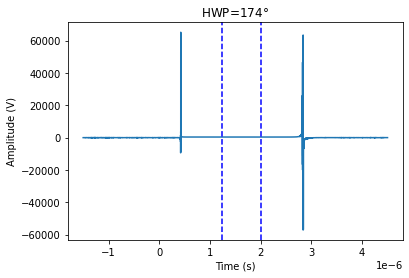

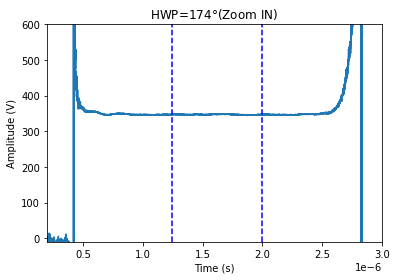

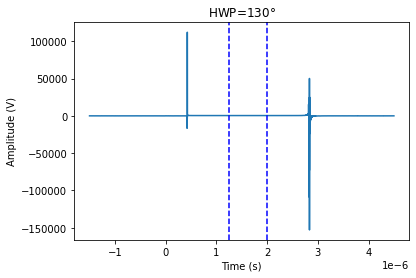

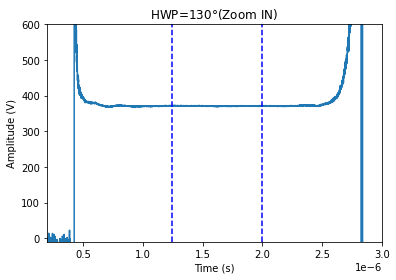

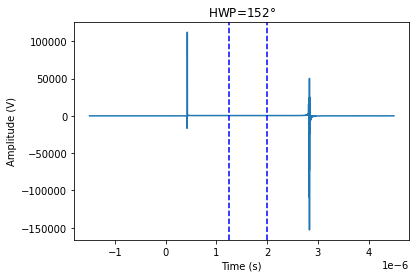

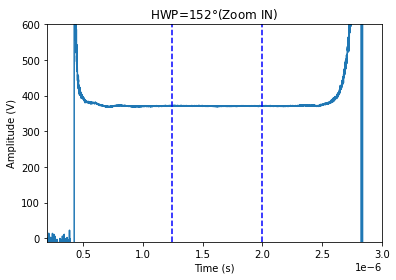

In [38]:
example=pd.read_csv(os.path.join(path,referece_files[0]))
example=example.to_numpy()

normalised_ref_curve=np.empty([len(example[:,0]),len(referece_files)])
normalised_reference=np.empty(len(referece_files))

for index, ref_file in enumerate(referece_files):
    ref=pd.read_csv(os.path.join(path,ref_file))
    ref=ref.to_numpy()

    transmitted_ref=ref[:,2]
    T_max_ref=np.max(transmitted_ref)
    mask1 = (transmitted_ref[:-1] < T_max_ref*0.7) & (transmitted_ref[1:] > T_max_ref*0.7)
    mask2 = (transmitted_ref[:-1] > T_max_ref*0.7) & (transmitted_ref[1:] < T_max_ref*0.7)
    Trigger_pos_T_ref=np.flatnonzero(mask1 | mask2)+1 # Lines 6~9 are used to find the rising and falling edges
    Trigger_pos_T_ref_min=np.min(Trigger_pos_T_ref) # find the minimum value of the rising edge 
    Trigger_pos_T_ref_max=np.max(Trigger_pos_T_ref) # find the maximum value of the falling edge
    pos_T_ref_start=round(Trigger_pos_T_ref_min+(Trigger_pos_T_ref_max-Trigger_pos_T_ref_min)/3)
    pos_T_ref_stop=round(Trigger_pos_T_ref_min+(Trigger_pos_T_ref_max-Trigger_pos_T_ref_min)*3/4) # choose the region of the measured trace for averaging to get the amplitude for OD calculation
    T_ref_ave=np.average(transmitted_ref[pos_T_ref_start:pos_T_ref_stop])

    reflected_ref=ref[:,3]
    R_max_ref=np.max(reflected_ref)
    mask1 = (reflected_ref[:-1] < R_max_ref*0.7) & (reflected_ref[1:] > R_max_ref*0.7)
    mask2 = (reflected_ref[:-1] > R_max_ref*0.7) & (reflected_ref[1:] < R_max_ref*0.7)
    Trigger_pos_R_ref=np.flatnonzero(mask1 | mask2)+1 # find the rising and falling edges
    Trigger_pos_R_ref_min=np.min(Trigger_pos_R_ref) # find the minimum value of the rising edge 
    Trigger_pos_R_ref_max=np.max(Trigger_pos_R_ref) # find the maximum value of the falling edge
    pos_R_ref_start=round(Trigger_pos_R_ref_min+(Trigger_pos_R_ref_max-Trigger_pos_R_ref_min)/3)
    pos_R_ref_stop=round(Trigger_pos_R_ref_min+(Trigger_pos_R_ref_max-Trigger_pos_R_ref_min)*3/4)
    R_ref_ave=np.average(reflected_ref[pos_R_ref_start:pos_R_ref_stop])

    normalised_ref_curve[:,index]=transmitted_ref/reflected_ref
    normalised_reference[index]=T_ref_ave/R_ref_ave
    #Plot raw traces and also show the region between the two vertical dashed blue lines is used to calculated the averaged amplitude
    if Plot_raw_data==1:

        fig,ax=plt.subplots()
        ax.plot(ref[:,0],normalised_ref_curve[:,index])
        ax.axvline(ref[pos_T_ref_start,0],color='b',linestyle='dashed')
        ax.axvline(ref[pos_T_ref_stop,0],color='b',linestyle='dashed')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude (V)')
        ax.set_title('HWP='+"{}".format(HWP[index])+'$\degree$')

        fig,ax=plt.subplots()
        ax.plot(ref[:,0],normalised_ref_curve[:,index])
        ax.axvline(ref[pos_T_ref_start,0],color='b',linestyle='dashed')
        ax.axvline(ref[pos_T_ref_stop,0],color='b',linestyle='dashed')
        ax.set_xlabel('Time (s)')
        ax.set_xlim([0.2e-6,3e-6])
        ax.set_ylabel('Amplitude (V)')
        ax.set_ylim([-10,600])
        ax.set_title('HWP='+"{}".format(HWP[index])+'$\degree$'+'(Zoom IN)')


C:\Users\wj2002\AppData\Local\Temp\ipykernel_18204\3516012283.py:105: RuntimeWarning: invalid value encountered in log
  OD_curve_1=np.log(normalised_ref_curve[:,0]/normalisation_1)
C:\Users\wj2002\AppData\Local\Temp\ipykernel_18204\3516012283.py:106: RuntimeWarning: invalid value encountered in log
  OD_curve_2=np.log(normalised_ref_curve[:,1]/normalisation_2)
C:\Users\wj2002\AppData\Local\Temp\ipykernel_18204\3516012283.py:107: RuntimeWarning: invalid value encountered in log
  OD_curve_3=np.log(normalised_ref_curve[:,2]/normalisation_3)
C:\Users\wj2002\AppData\Local\Temp\ipykernel_18204\3516012283.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


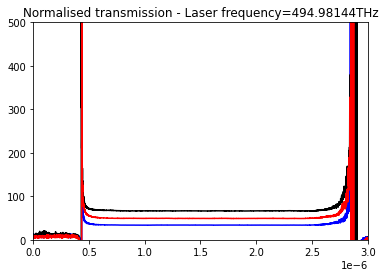

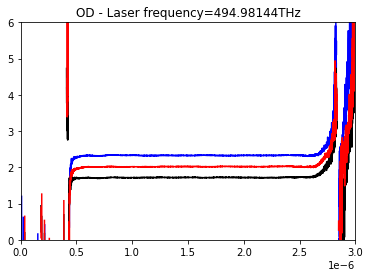

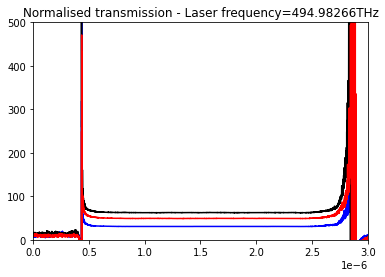

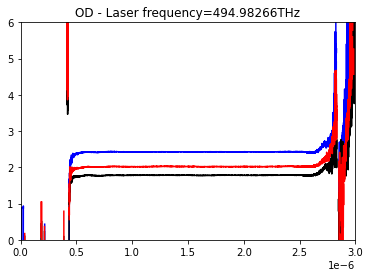

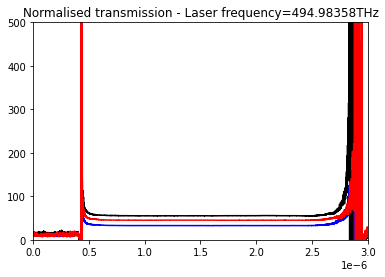

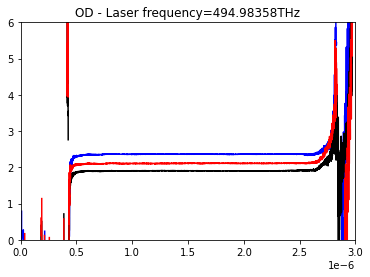

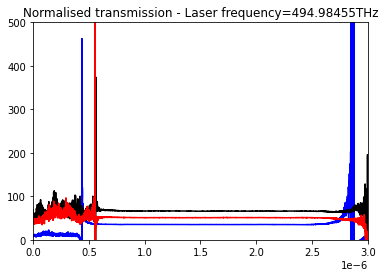

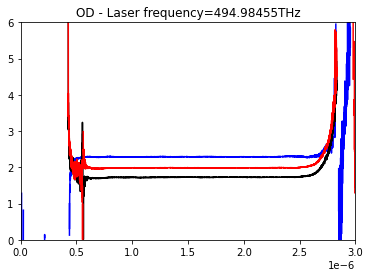

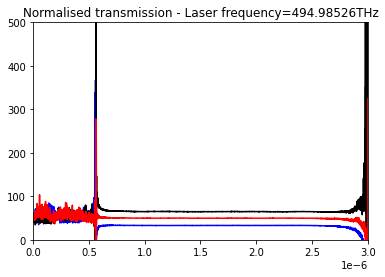

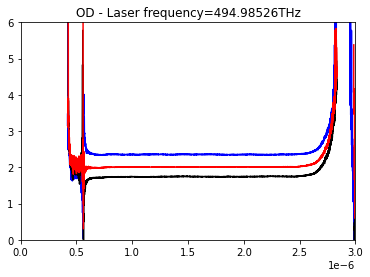

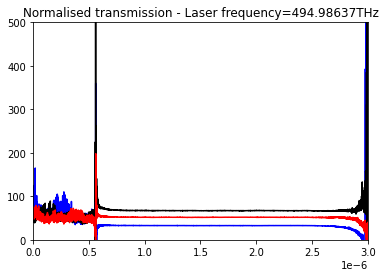

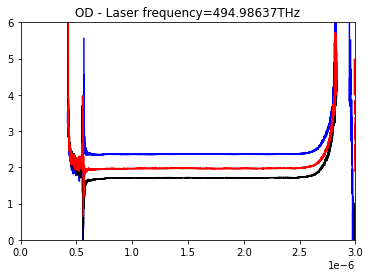

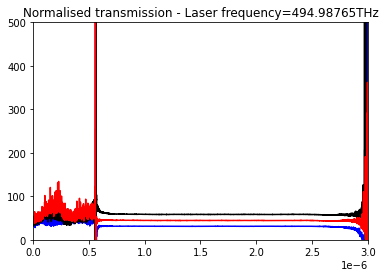

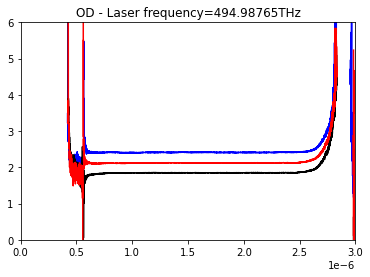

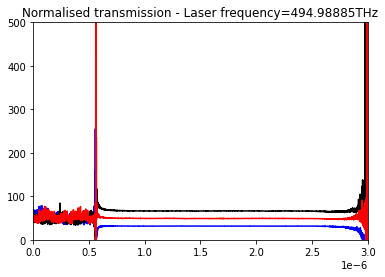

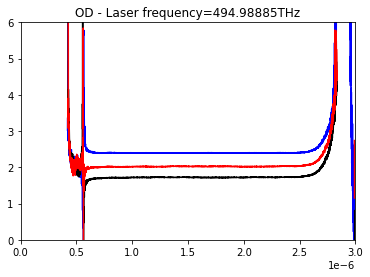

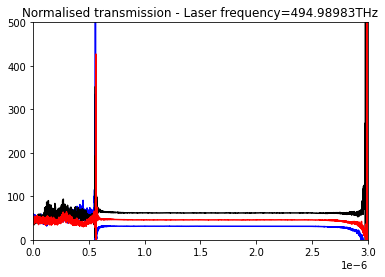

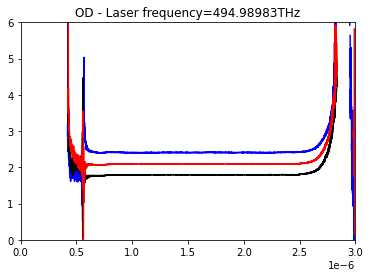

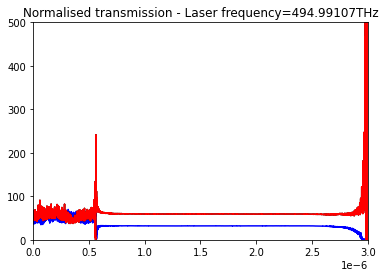

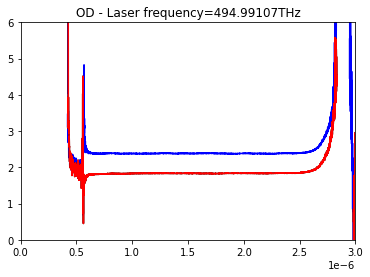

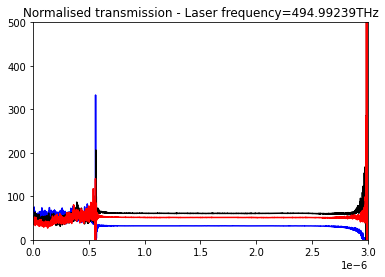

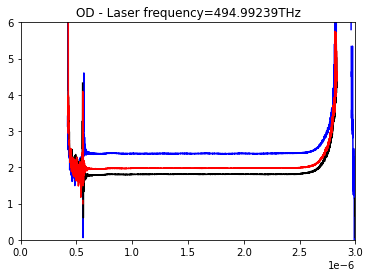

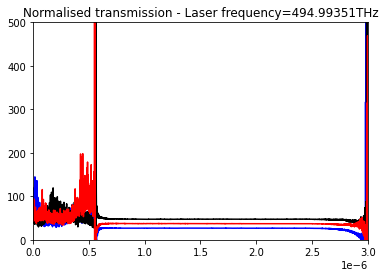

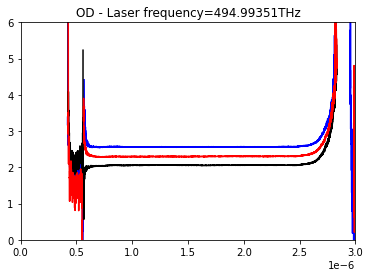

In [39]:
# Initialise the data saving array
T_1_ave=np.empty([int(file_size[0]/len(referece_files)),1])
T_2_ave=np.empty([int(file_size[0]/len(referece_files)),1])
T_3_ave=np.empty([int(file_size[0]/len(referece_files)),1])
R_1_ave=np.empty([int(file_size[0]/len(referece_files)),1])
R_2_ave=np.empty([int(file_size[0]/len(referece_files)),1])
R_3_ave=np.empty([int(file_size[0]/len(referece_files)),1])

for index in range(int(file_size[0]/len(referece_files))):
    
    data_1=pd.read_csv(os.path.join(path,list_csv_new[index*len(referece_files)])) # Read the data files when the laser polarisation is parallel to the crystal axis
    data_1=data_1.to_numpy()

    data_2=pd.read_csv(os.path.join(path,list_csv_new[index*len(referece_files)+1])) # Read the data files when the laser polarisation is perpendicular to the crystal axis
    data_2=data_2.to_numpy()

    data_3=pd.read_csv(os.path.join(path,list_csv_new[index*len(referece_files)+2])) # Read the data files when the laser polarisation is perpendicular to the crystal axis
    data_3=data_3.to_numpy()

    time_1=data_1[:,0] # Read the time scale from the saved scope data
    time_2=data_2[:,0] 
    time_3=data_3[:,0] 
    
    transmitted_1=data_1[:,2] # Read the measured transmitted traces (from the balance detector Monitor+) from the saved scope data, Channel 2
    transmitted_2=data_2[:,2]
    transmitted_3=data_3[:,2]
    T_max_1=np.max(transmitted_1)
    T_max_2=np.max(transmitted_2)
    T_max_3=np.max(transmitted_3)

    mask1 = (transmitted_1[:-1] < T_max_1*0.7) & (transmitted_1[1:] > T_max_1*0.7)
    mask2 = (transmitted_1[:-1] > T_max_1*0.7) & (transmitted_1[1:] < T_max_1*0.7)
    Trigger_pos_T_1=np.flatnonzero(mask1 | mask2)+1 # find the rising and falling edges
    Trigger_pos_T_1_min=np.min(Trigger_pos_T_1) # find the minimum value of the rising edge 
    Trigger_pos_T_1_max=np.max(Trigger_pos_T_1) # find the maximum value of the falling edge
    pos_T_1_start=round(Trigger_pos_T_1_min+(Trigger_pos_T_1_max-Trigger_pos_T_1_min)/3)
    pos_T_1_stop=round(Trigger_pos_T_1_min+(Trigger_pos_T_1_max-Trigger_pos_T_1_min)*3/4)
    T_1_ave[index]=np.average(transmitted_1[pos_T_1_start:pos_T_1_stop])
    
    mask1 = (transmitted_2[:-1] < T_max_2*0.7) & (transmitted_2[1:] > T_max_2*0.7)
    mask2 = (transmitted_2[:-1] > T_max_2*0.7) & (transmitted_2[1:] < T_max_2*0.7)
    Trigger_pos_T_2=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_T_2_min=np.min(Trigger_pos_T_2)
    Trigger_pos_T_2_max=np.max(Trigger_pos_T_2)
    pos_T_2_start=round(Trigger_pos_T_2_min+(Trigger_pos_T_2_max-Trigger_pos_T_2_min)/3)
    pos_T_2_stop =round(Trigger_pos_T_2_min+(Trigger_pos_T_2_max-Trigger_pos_T_2_min)*3/4)
    T_2_ave[index]=np.average(transmitted_2[pos_T_2_start:pos_T_2_stop])

    mask1 = (transmitted_3[:-1] < T_max_3*0.7) & (transmitted_3[1:] > T_max_3*0.7)
    mask2 = (transmitted_3[:-1] > T_max_3*0.7) & (transmitted_3[1:] < T_max_3*0.7)
    Trigger_pos_T_3=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_T_3_min=np.min(Trigger_pos_T_3)
    Trigger_pos_T_3_max=np.max(Trigger_pos_T_3)
    pos_T_3_start=round(Trigger_pos_T_3_min+(Trigger_pos_T_3_max-Trigger_pos_T_3_min)/3)
    pos_T_3_stop =round(Trigger_pos_T_3_min+(Trigger_pos_T_3_max-Trigger_pos_T_3_min)*3/4)
    T_3_ave[index]=np.average(transmitted_3[pos_T_3_start:pos_T_3_stop])
    
    reflected_1=data_1[:,3] # Read the measured transmitted traces (from the balance detector Monitor+) from the saved scope data for normalising, Channel 3
    reflected_2=data_2[:,3]
    reflected_3=data_3[:,3]
    R_max_1=np.max(reflected_1)
    R_max_2=np.max(reflected_2)
    R_max_3=np.max(reflected_3)

    mask1 = (reflected_1[:-1] < R_max_1*0.7) & (reflected_1[1:] > R_max_1*0.7)
    mask2 = (reflected_1[:-1] > R_max_1*0.7) & (reflected_1[1:] < R_max_1*0.7)
    Trigger_pos_R_1=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_R_1_min=np.min(Trigger_pos_R_1)
    Trigger_pos_R_1_max=np.max(Trigger_pos_R_1)
    pos_R_1_start=round(Trigger_pos_R_1_min+(Trigger_pos_R_1_max-Trigger_pos_R_1_min)/3)
    pos_R_1_stop= round(Trigger_pos_R_1_min+(Trigger_pos_R_1_max-Trigger_pos_R_1_min)*3/4)
    R_1_ave[index]=np.average(reflected_1[pos_R_1_start:pos_R_1_stop])

    mask1 = (reflected_2[:-1] < R_max_2*0.7) & (reflected_2[1:] > R_max_2*0.7)
    mask2 = (reflected_2[:-1] > R_max_2*0.7) & (reflected_2[1:] < R_max_2*0.7)
    Trigger_pos_R_2=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_R_2_min=np.min(Trigger_pos_R_2)
    Trigger_pos_R_2_max=np.max(Trigger_pos_R_2)
    pos_R_2_start=round(Trigger_pos_R_2_min+(Trigger_pos_R_2_max-Trigger_pos_R_2_min)/3)
    pos_R_2_stop= round(Trigger_pos_R_2_min+(Trigger_pos_R_2_max-Trigger_pos_R_2_min)*3/4)
    R_2_ave[index]=np.average(reflected_2[pos_R_2_start:pos_R_2_stop])

    mask1 = (reflected_3[:-1] < R_max_3*0.7) & (reflected_3[1:] > R_max_3*0.7)
    mask2 = (reflected_3[:-1] > R_max_3*0.7) & (reflected_3[1:] < R_max_3*0.7)
    Trigger_pos_R_3=np.flatnonzero(mask1 | mask2)+1
    Trigger_pos_R_3_min=np.min(Trigger_pos_R_3)
    Trigger_pos_R_3_max=np.max(Trigger_pos_R_3)
    pos_R_3_start=round(Trigger_pos_R_3_min+(Trigger_pos_R_3_max-Trigger_pos_R_3_min)/3)
    pos_R_3_stop= round(Trigger_pos_R_3_min+(Trigger_pos_R_3_max-Trigger_pos_R_3_min)*3/4)
    R_3_ave[index]=np.average(reflected_3[pos_R_3_start:pos_R_3_stop])

    normalisation_1=transmitted_1/reflected_1
    normalisation_2=transmitted_2/reflected_2
    normalisation_3=transmitted_3/reflected_3

    fig,ax=plt.subplots()
    ax.plot(time_1,normalisation_1,'b')
    ax.plot(time_2,normalisation_2,'k')
    ax.plot(time_3,normalisation_3,'r')
    ax.set_xlim([0,3e-6])
    ax.set_ylim([0,500])
    ax.set_title('Normalised transmission - '+'Laser frequency='+"{}".format(freq[index])+'THz')
    

    OD_curve_1=np.log(normalised_ref_curve[:,0]/normalisation_1)
    OD_curve_2=np.log(normalised_ref_curve[:,1]/normalisation_2)
    OD_curve_3=np.log(normalised_ref_curve[:,2]/normalisation_3)
    
    fig,ax=plt.subplots()
    ax.plot(time_1,OD_curve_1,'b')
    ax.plot(time_2,OD_curve_2,'k')
    ax.plot(time_3,OD_curve_3,'r')
    ax.set_xlim([0,3e-6])
    ax.set_ylim([0,6])
    ax.set_title('OD - '+'Laser frequency='+"{}".format(freq[index])+'THz')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


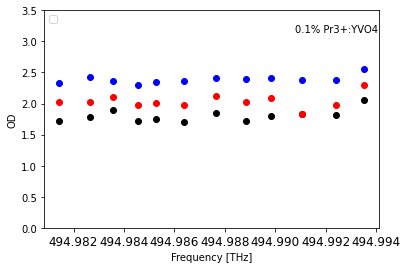

In [41]:
normalised_1=np.empty([int(file_size[0]/len(referece_files)),1])
normalised_2=np.empty([int(file_size[0]/len(referece_files)),1])
normalised_3=np.empty([int(file_size[0]/len(referece_files)),1])
OD_1=np.empty([int(file_size[0]/len(referece_files)),1])
OD_2=np.empty([int(file_size[0]/len(referece_files)),1])
OD_3=np.empty([int(file_size[0]/len(referece_files)),1])

for index in range(int(file_size[0]/len(referece_files))):
    
    normalised_1[index]=T_1_ave[index]/R_1_ave[index] # Do the normalisation of the transmitted signal over the reflected signal, to eliminate the power fluctuation 
    normalised_2[index]=T_2_ave[index]/R_2_ave[index]
    normalised_3[index]=T_3_ave[index]/R_3_ave[index]
    OD_1[index]=np.log(normalised_reference[0]/normalised_1[index])
    OD_2[index]=np.log(normalised_reference[1]/normalised_2[index])
    OD_3[index]=np.log(normalised_reference[2]/normalised_3[index])

fig,ax=plt.subplots()
ax.scatter(freq,OD_1,color='b')
ax.scatter(freq,OD_2,color='k')
ax.scatter(freq,OD_3,color='r')
ax.legend(loc='upper left')
ax.set_ylim(0,3.5)
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('Frequency [THz]')
ax.set_ylabel('OD')
plt.xticks(fontsize=12)
ax.annotate('0.1% Pr3+:YVO4',
            xy=(1.057, 0.8), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='k')
fig.patch.set_facecolor('white')